## DataFrame.groupby

- DataFrame을 분할 기준 컬럼을 기준으로 나누는 함수
- 사용구조:df.groupby(분할기준 컬럼)[적용 기준 칼럼].집계함수
- 주요입력
  - by: 분할 기준 컬럼(목록)
  - as_index : 분할 기준 컬럼들을 인덱스로 사용할 것인지 여부(default:True)
- 여러개의 집계 함수나 사용자 정의 함수를 쓰고 싶다면 agg함수를 사용해야함
- 보통은 출력 결과 자체가 결과물인 경우에는 pivot_table을, 중간 산출물인 경우에는 groupby를 쓴다
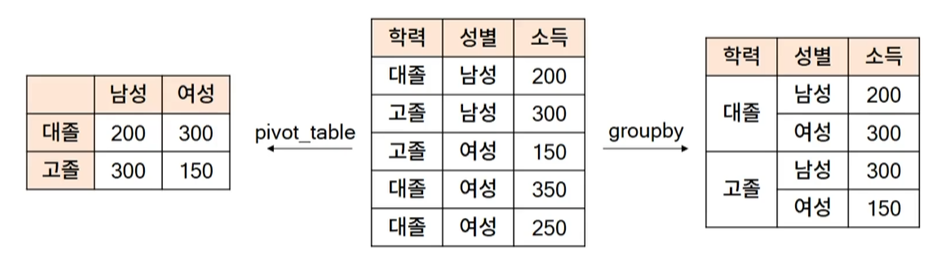

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [2]:
df = pd.read_csv("온라인_판매기록.csv", engine = "python")
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


In [3]:
df.groupby(['쇼핑몰 유형'])['수량'].mean()

쇼핑몰 유형
동물병원      5.512889
온라인II     5.807143
온라인사이트    5.477670
유통대리점     5.493333
전시회       5.556701
쿠팡        5.396389
할인점       5.288525
할인점II     5.469565
Name: 수량, dtype: float64

In [4]:
df.groupby(['쇼핑몰 유형'], as_index = False)['수량'].mean()

,쇼핑몰 유형,수량
0,동물병원,5.512889
1,온라인II,5.807143
2,온라인사이트,5.477670
3,유통대리점,5.493333
4,전시회,5.556701
5,쿠팡,5.396389
6,할인점,5.288525
7,할인점II,5.469565


In [5]:
df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].agg(['mean', 'max'])

<ipython-input-5-5e7b3a532887>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].agg(['mean', 'max'])


수량               판매금액         
            mean max           mean      max
쇼핑몰 유형                                      
동물병원    5.512889  10  439390.844444  1515000
온라인II   5.807143  10  475726.428571  1530000
온라인사이트  5.477670  10  454746.019417  1533000
유통대리점   5.493333  10  462627.384615  1530000
전시회     5.556701  10  447135.051546  1486000
쿠팡      5.396389  10  433447.802198  1533000
할인점     5.288525  10  427162.295082  1533000
할인점II   5.469565  10  440754.782609  1515000

In [6]:
def my_func(value):
    return max(value) - min(value)

df.groupby(['쇼핑몰 유형', '제품'])['수량', '판매금액'].agg(my_func)

<ipython-input-6-c70a8657894c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['쇼핑몰 유형', '제품'])['수량', '판매금액'].agg(my_func)


수량    판매금액
쇼핑몰 유형 제품               
동물병원   제품_01   7  512400
       제품_02   8  129600
       제품_03   9  351900
       제품_04   8  341600
       제품_05   8  860800
...           ..     ...
할인점II  제품_93   0       0
       제품_95   2  194600
       제품_97   0       0
       제품_98   0       0
       제품_99   0       0

[762 rows x 2 columns]